In [19]:
#Importar datasets
import pandas as pd

df_men = pd.read_csv('men_results.csv')
df_women = pd.read_csv('women_results.csv')

df_men['date'] = pd.to_datetime(df_men['date'])


df_men = df_men[(df_men['date'].dt.year >= 2000) & (df_men['tournament']== 'FIFA World Cup')]

print(df_men['tournament'].shape[0])

384

In [20]:
df_women['date'] = pd.to_datetime(df_women['date'])


df_women = df_women[(df_women['date'].dt.year >= 2000) & (df_women['tournament']== 'FIFA World Cup')]

df_women['tournament'].unique()

print(df_women['tournament'].shape[0])

200


¿Se marcan más goles en los partidos internacionales de fútbol femenino que en los masculinos (a partir de 2000)?

Se supone un nivel de significancia del 10%

In [24]:
df_men['goals'] = df_men['home_score'] + df_men['away_score']
df_women['goals'] = df_women['home_score'] + df_women['away_score']

print(df_men['goals'].mean())
print(df_women['goals'].mean())


2.5130208333333335
2.98


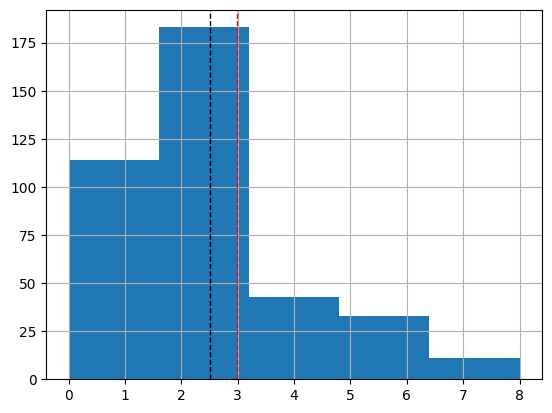

In [28]:
import matplotlib.pyplot as plt

# Continuando con el DataFrame filtrado previamente
# Nota: Usaremos el DataFrame 'df_man_filtrado' que ya filtramos para partidos después del año 2000 en la Copa Mundial de la FIFA

# Calculamos la media de 'total_goals' nuevamente


# Creando un histograma para 'total_goals' en el DataFrame filtrado


# Agregando títulos y etiquetas


# Mostrar la media en el gráfico


# Mostrar el histograma
df_men['goals'].hist(bins=5)
plt.axvline(df_men['goals'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_women['goals'].mean(), color='r', linestyle='dashed', linewidth=1)


In [29]:
! pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.6 MB/s eta 0:00:00


In [30]:
#Hipotesis
#H0=media_goles_mujeres = media_goles_hombres (nula)
#H1=media_goles_mujeres > media_goles_hombres

from pingouin import ttest

res = ttest(df_women['goals'],df_men['goals'],alternative='greater',confidence=0.90)

print(res)


               T         dof alternative     p-val  \
T-test  2.812823  340.102801     greater  0.002598   

                             CI90%   cohen-d   BF10     power  
T-test  [0.25380448523145904, inf]  0.261228  8.927  0.911063  


Dado que la p-val es inferior al 0.05 podemos rechazar la hipotesis nula.